In [38]:
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

In [48]:
from sklearn.model_selection import learning_curve
import seaborn as sns
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, X, y, cv, data_points=5, groups=None):
    t_sizes = np.linspace(0.1, 1.0, data_points)
    train_sizes, train_scores, valid_scores = learning_curve(estimator,
        X, y.values.ravel(), cv=cv, scoring="balanced_accuracy", n_jobs=-1, verbose=10, train_sizes=t_sizes, groups=groups,
        shuffle=True, random_state=42)
    training_loss = train_scores.flatten()
    valid_loss = valid_scores.flatten()
    losses = np.concatenate([training_loss, valid_loss])
    learning = pd.DataFrame(losses, columns=['accuracy'])
    n_splits = cv.get_n_splits()
    learning['set'] = ['training'] * (data_points * n_splits) + ['validation'] * (data_points * n_splits)
    learning['training set size'] = [s for s in train_sizes for i in range(n_splits)] * 2
    plt.figure(figsize=(20,10))
#     plt.title("Learning Curve", fontsize=50)
    plt.xlabel("Training Set Size", fontsize=30)
    plt.ylabel("Balanced Accuracy", fontsize=30)
    sns.lineplot(data=learning, x='training set size', y='accuracy', hue="set")
    plt.savefig(config.OUTPUT_DIR + "learning_curve.png")

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from functions import load_taxonomy, get_groups
import numpy as np
import pandas as pd
import GMHI
import config

In [50]:
groups = get_groups(X)
groups

array([ 8,  8,  8, ...,  5,  5, 41])

[learning_curve] Training set sizes: [ 452  904 1356 1809 2261 2713 3166 3618 4070 4523]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of 100 | elapsed:    0.0s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  13 out of 100 | elapsed:    0.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  35 out of 100 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  46 out of 100 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  57 out of 100 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  68 out of 100 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  90 out of 100 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


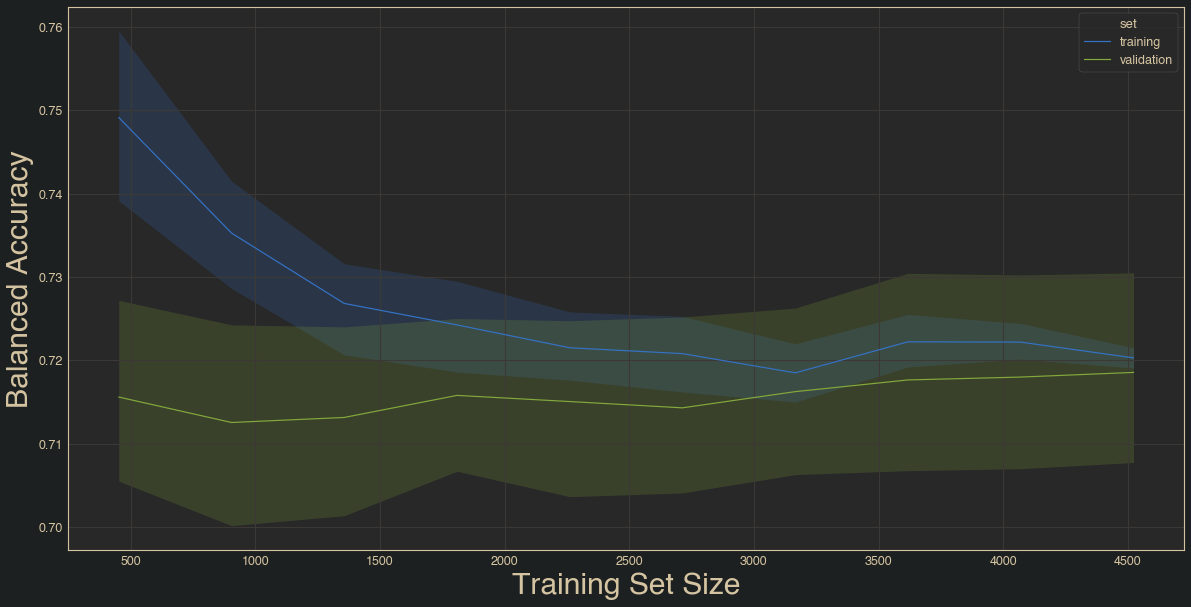

In [51]:
strat_kfold = StratifiedKFold(10, shuffle=True, random_state=42)

logreg = LogisticRegression(C=1, penalty='l1',
fit_intercept=True, max_iter=3000, random_state=42, # l1_ratio=0.8,
                    solver='saga', n_jobs=-1, verbose=0)

gmhi = GMHI.GMHI(use_shannon=False, theta_f=1.6, theta_d=0)

X, y = load_taxonomy(boolean=True)

plot_learning_curve(gmhi, X, y, strat_kfold, data_points=10, groups=groups)